In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

### Read training dataset

In [2]:
train = pd.read_csv('../input/titanic/train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Read Testing Dataset

In [7]:
test = pd.read_csv('../input/titanic/test.csv')

In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
test.shape

(418, 11)

### Missing Data

<AxesSubplot:>

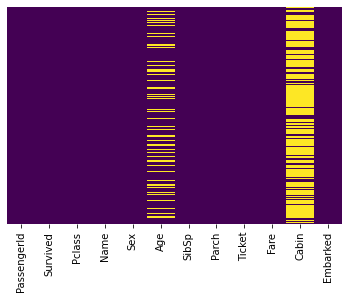

In [10]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [11]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
train.describe().T.style.background_gradient(subset = ['mean','50%'], cmap = 'Reds').background_gradient(subset = ['min', 'max'], cmap = 'Blues')

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000000,446.000000,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.000000,29.699118,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200


In [13]:
correlations = train.corr()

<AxesSubplot:>

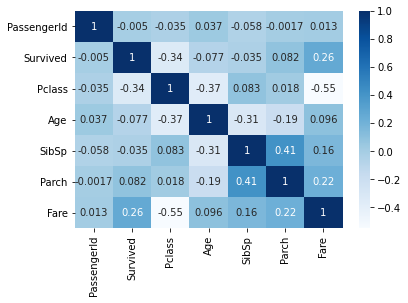

In [14]:
sns.heatmap(correlations, annot = True, cmap = 'Blues')

### EDA

<AxesSubplot:xlabel='Survived', ylabel='count'>

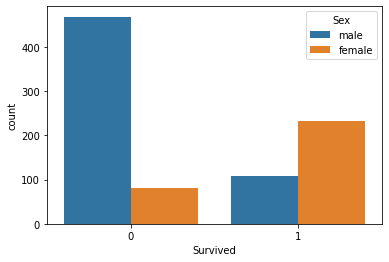

In [15]:
sns.countplot(data = train, x = 'Survived', hue = 'Sex')

**Conclusion** - Number of females Survived is greater than the number of males Survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

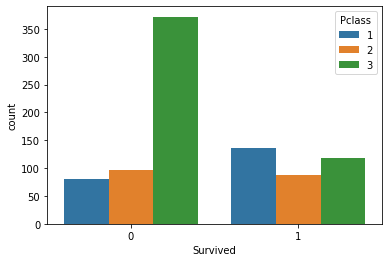

In [16]:
sns.countplot(data = train, x = 'Survived', hue = 'Pclass')

**conclusion** - More people of Pclass 3 died, while more of Pclass 1 survived

### **Feature Transformation of - 'Age' Column**

<AxesSubplot:xlabel='Age', ylabel='Count'>

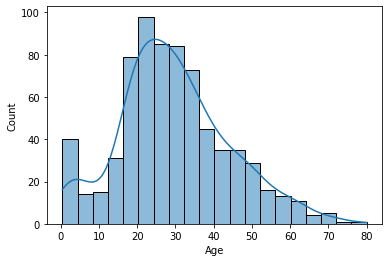

In [17]:
sns.histplot(data = train, x = 'Age', kde = True)

Most people fall between age group 18 to 35

Age dataset is **right-skewed**

<AxesSubplot:xlabel='Age', ylabel='Count'>

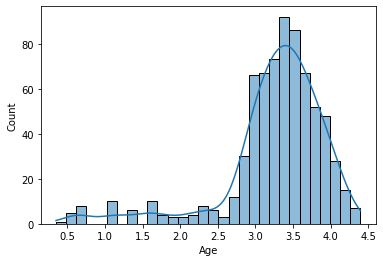

In [18]:
ds = np.log1p(train['Age'])
sns.histplot(data = train, x = ds, kde = True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

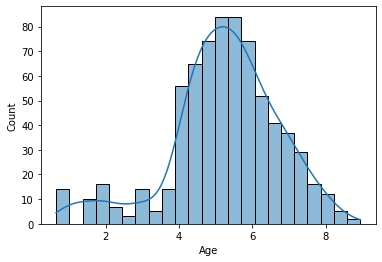

In [19]:
ds = np.sqrt(train['Age'])
sns.histplot(data = train, x = ds, kde = True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

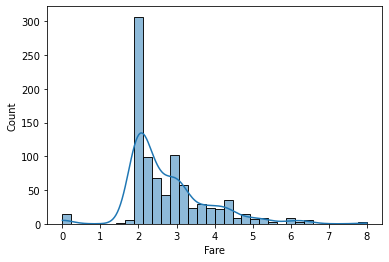

In [20]:
ds = train['Fare']**(1/3)
sns.histplot(data = train, x = ds, kde = True)

### **Feature Transformation - 'Fare' Column**

<AxesSubplot:xlabel='Fare', ylabel='Count'>

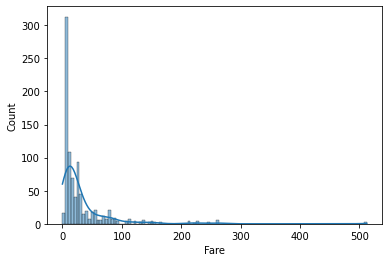

In [21]:
sns.histplot(data = train, x = 'Fare', kde = True)

Fare dataset is **right-skewed**

<AxesSubplot:xlabel='Fare', ylabel='Count'>

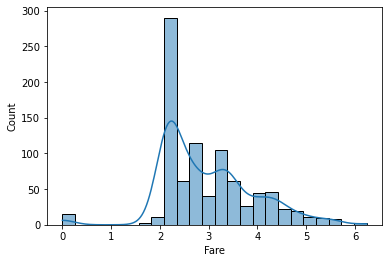

In [22]:
ds = np.log1p(train['Fare'])
sns.histplot(data = train, x = ds, kde = True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

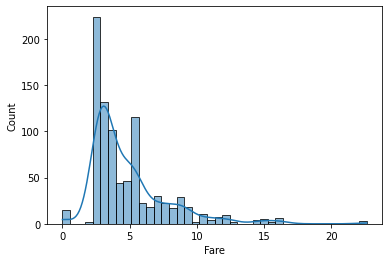

In [23]:
ds = np.sqrt(train['Fare'])
sns.histplot(data = train, x = ds, kde = True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

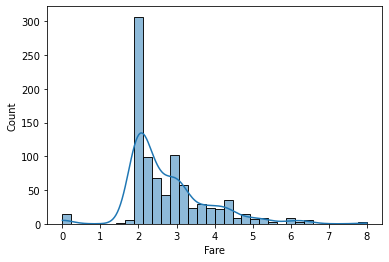

In [24]:
ds = train['Fare']**(1/3)
sns.histplot(data = train, x = ds, kde = True)

<AxesSubplot:>

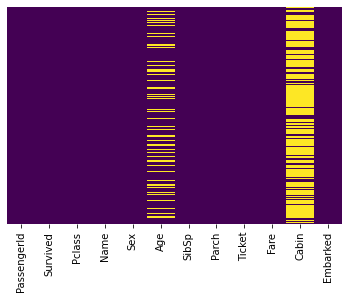

In [25]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

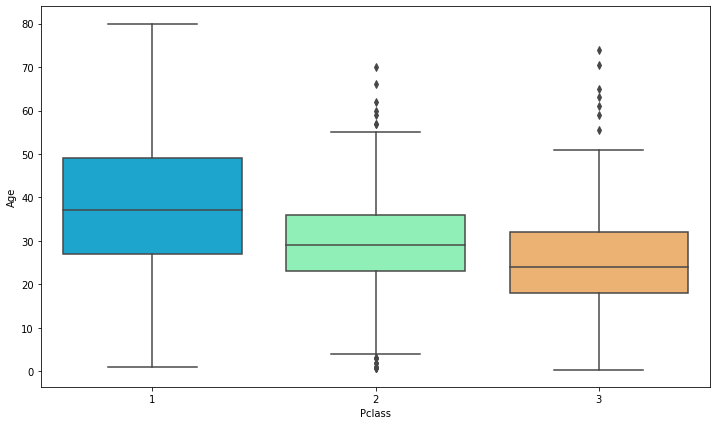

In [26]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'Pclass', y = 'Age', palette = 'rainbow', data = train)

In [27]:
# mean Age of Pclass 1 = 38
# mean Age of Pclass 2 = 30
# mean Age of Pclass 3 = 25

def impute_age(col):
    Age = col[0]
    Pclass = col[1]
    if pd.isnull(Age):
        if(Pclass == 1):
            return 38
        elif(Pclass == 2):
            return 30
        else:
            return 25
    else:
        return Age

In [28]:
def process_data(df):
    df.Age = df[['Age', 'Pclass']].apply(impute_age, axis = 1)
    df['Fare'] = np.log1p(df['Fare'])
    df['Age'] = np.sqrt(df['Age'])
    df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
    return df

In [29]:
train = process_data(train)

<AxesSubplot:>

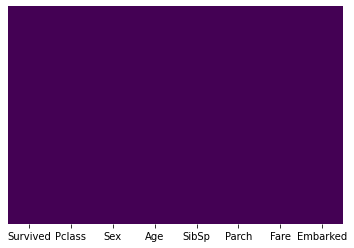

In [30]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [31]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,4.690416,1,0,2.110213,S
1,1,1,female,6.164414,1,0,4.280593,C
2,1,3,female,5.099020,0,0,2.188856,S
3,1,1,female,5.916080,1,0,3.990834,S
4,0,3,male,5.916080,0,0,2.202765,S


In [32]:
Id = test['PassengerId']
test = process_data(test)

In [33]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,5.873670,0,0,2.178064,Q
1,3,female,6.855655,1,0,2.079442,S
2,2,male,7.874008,0,0,2.369075,Q
3,3,male,5.196152,0,0,2.268252,S
4,3,female,4.690416,1,1,2.586824,S


<AxesSubplot:>

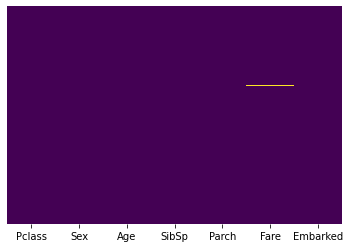

In [34]:
sns.heatmap(test.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Minor Missing values can be handled as below

### Building a Model

In [35]:
target = 'Survived'
cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [36]:
cols

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [37]:
num_cols = [col for col in cols if train[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in cols if train[col].dtype == 'object']

In [38]:
num_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [39]:
cat_cols

['Sex', 'Embarked']

In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [41]:
num_processor = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('scaler', StandardScaler())
])

In [42]:
cat_processor = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown = 'ignore'))
])

In [43]:
pre_processor = ColumnTransformer([
    ('num', num_processor, num_cols),
    ('cat', cat_processor, cat_cols)
])

In [44]:
X = train[cols]
y = train[target]

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [47]:
print(X_train.shape)
print(y_train.shape)

(623, 7)
(623,)


In [48]:
print(X_test.shape)
print(y_test.shape)

(268, 7)
(268,)


In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
model = GradientBoostingClassifier(learning_rate=0.05, n_estimators=200, random_state = 42)

In [51]:
def build_model(my_model):
    clf = Pipeline(steps = [
        ('preprocess', pre_processor),
        ('model', my_model)
    ])
    clf.fit(X_train, y_train)
    print("Train set score:", clf.score(X_train, y_train))
    print("Test set score:", clf.score(X_test, y_test))
    
    #Predictions
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    predictions = clf.predict(test)
    
    #confusion_matrices
    plot_confusion_matrix(clf, X_train, y_train)
    plt.title('Confusion Matrix Training Dataset')
    plot_confusion_matrix(clf, X_test, y_test)
    plt.title('Confusion Matrix Testing Dataset')
    
    return pred_train, pred_test, predictions

Train set score: 0.9069020866773676
Test set score: 0.8208955223880597


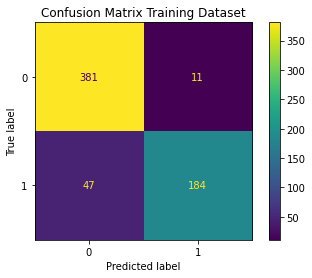

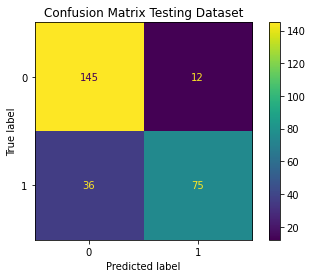

In [52]:
pred_train, pred_test, predictions = build_model(model)

In [53]:
print(classification_report(y_train, pred_train))
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       392
           1       0.94      0.80      0.86       231

    accuracy                           0.91       623
   macro avg       0.92      0.88      0.90       623
weighted avg       0.91      0.91      0.91       623

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       157
           1       0.86      0.68      0.76       111

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268



In [54]:
output = pd.DataFrame({'PassengerId': Id, 'Survived': predictions})
output.to_csv('submission.csv', index = False)

In [55]:
sub = pd.read_csv('./submission.csv')
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
